# Data Methods for Health Research : SYVM4 https://github.com/SYVM4/CHMEGH37---SYVM4/blob/master/CHMEGH37%20-%20SYVM4%20(1).ipynb 

## Assignment A

The NHS has been challenged to make “efficiency savings” and you have been commissioned by an NHS executive to review, document and assess GP prescribing costs. Using data from the HSCIC GP Practice Prescribing dataset for your assigned city only, address the following queries using a combination of narrative, tables, figures and descriptive statistcs:


#### 1. Identify all GP practices and produce a table with the total number of prescriptions and their total actual cost(using the ACT COST column).

In [1]:
# Import Prelimminaries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read in the practice data into a dataframe
url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv'
cols2 = ['yearmonth', 'prac_code', 'practice', 'address1', 'address2',
         'city', 'region', 'postcode']
practice_df = pd.read_csv(url, header=None, names=cols2, index_col=False,
                          skiprows=1).rename(columns=lambda x: x.strip())
practice_df.head()

,yearmonth,prac_code,practice,address1,address2,city,region,postcode
0,201512,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
1,201512,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
2,201512,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,TS1 3BE
3,201512,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ
4,201512,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MED PRACT,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AT


In [3]:
# Read in the prescribing data into a dataframe
url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/prescribing_Dec2015.csv'
cols2 = ['sha', 'pct', 'prac_code', 'bnf_code', 'bnf_name', 'items',
         'nic', 'act_cost', 'quantity', 'period']
prescribing_df = pd.read_csv(url, header=None, names=cols2, index_col=False,
                             skiprows=1).rename(columns=lambda x: x.strip())
prescribing_df.head()

,sha,pct,prac_code,bnf_code,bnf_name,items,nic,act_cost,quantity,period
0,Q44,RJN,Y05218,0501013K0AAAJAJ,Co-Amoxiclav_Tab 500mg/125mg,1,3.59,3.33,21,201512
1,Q44,RJN,Y05218,0501130R0AAAAAA,Nitrofurantoin_Cap 50mg,1,14.39,13.42,28,201512
2,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,1,0.51,0.58,14,201512
3,Q44,RTV,Y04937,0401020P0AAABAB,Lorazepam_Tab 1mg,1,2.65,2.46,28,201512
4,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,2,2.01,2.08,84,201512


In [4]:
# Identify all the Sheffield practices in the practice dataset and 
# create a seperate dataframe
# Sheffield practice can be identified by using the city column 
shef_prac1 = practice_df.loc[practice_df['city'].str.contains('sheffield',
                                                              case=False)]

# Merge the sheffield practices dataframe and the prescribing dataframe  
# create a dataframe with all prescribing data in sheffield
sheff_prac = pd.merge(shef_prac1, prescribing_df, on='prac_code')

In [5]:
# use iloc function to output columns of interest 
sheff_prac1 = sheff_prac.iloc[:, [1,12,14,15]]


# group the dataframe by practice code
# sum the entire dataframe to observe total actual cost of each practice code
sheff_prac2 = sheff_prac1.groupby('prac_code').sum()

In [6]:
# Sheffield GPs with total number of prescriptions(quanitity) and ACT cost 

# create a merged dataframe with sheffield practice code and actual costs
# reset index 
all_prac = practice_df.set_index('prac_code')

# Merge the dataframes
shef_pres = pd.merge(all_prac, sheff_prac2, right_index=True, left_index=True)

shef_pres1 = shef_pres.iloc[:, [1,4,7,8,9]]
shef_pres1.head()

,practice,city,items,act_cost,quantity
prac_code,,,,,
C81002,MOSS VALLEY MEDICAL PRACTICE,SHEFFIELD,21270,122603.75,1594078
C81070,OAKHILL MEDICAL PRACTICE,SHEFFIELD,11805,82388.35,906422
C81095,DR HR MCMURRAY'S PRACTICE,NR.SHEFFIELD,6762,48849.79,464217
C85004,PENISTONE GROUP PMS PRACTICE,PENISTONE SHEFFIELD,40730,252318.29,2375126
C87004,KIVETON PARK MEDICAL PRACTICE,SHEFFIELD,26213,193432.30,1382116


In [7]:
shef_pres1.describe()

,items,act_cost,quantity
count,108.000000,108.000000,1.080000e+02
mean,11894.555556,87244.300278,9.039563e+05
std,9698.723912,65055.526014,6.878234e+05
min,3.000000,6.290000,1.330000e+02
25%,4833.000000,34078.577500,3.274660e+05
50%,10693.500000,82180.380000,8.991220e+05
75%,16906.750000,125747.975000,1.326288e+06
max,47086.000000,267142.150000,3.162149e+06


#### 2. Find the top ten most/least frequently prescribed medications across all practices. 

In [8]:
# Group by drug name
shef_pres_total = sheff_prac.groupby('bnf_name')['items', 'act_cost'].sum()
shef_pres_total.head()

,items,act_cost
bnf_name,,
365 Non Adherent 10cm x 10cm Pfa Plas Fa,1,0.51
3m Health Care_Cavilon Durable Barrier C,365,2949.57
3m Health Care_Cavilon No Sting 1ml Barr,14,254.42
3m Health Care_Cavilon No Sting 3ml Barr,8,200.55
3m Health Care_Cavilon No Sting Barrier,320,8262.94


In [9]:
#Top 10
shef_most = shef_pres_total.sort_values('items', axis=0, ascending = False).head(10)
shef_most

,items,act_cost
bnf_name,,
Omeprazole_Cap E/C 20mg,29820,40265.54
Paracet_Tab 500mg,26927,90880.27
Aspirin Disper_Tab 75mg,26089,19920.15
Simvastatin_Tab 40mg,23191,24715.29
Lansoprazole_Cap 30mg (E/C Gran),20854,30966.07
Amlodipine_Tab 5mg,19637,18061.33
Bendroflumethiazide_Tab 2.5mg,17673,15812.97
Metformin HCl_Tab 500mg,16502,62541.76
Simvastatin_Tab 20mg,15836,14217.11


In [10]:
# Last 10
shef_last = shef_pres_total.sort_values('items', axis=0, ascending = True).head(10)
shef_last


,items,act_cost
bnf_name,,
365 Non Adherent 10cm x 10cm Pfa Plas Fa,1,0.51
Lofric Primo Nelaton Tiemann Non-PVC 10-,1,254.09
Longtec_Tab 15mg M/R,1,24.27
Loperamide HCl_Oral Soln 25mg/5ml,1,156.33
Lophlex_Pdr Sach 27.8g (Unflav),1,267.98
Lopresor Sr_Tab 200mg,1,9.06
Loprofin_L/P Bread Roll P/Bke,1,7.78
Loprofin_L/P Bread Roll Wte P/Bke,1,10.28
Loprofin_L/P Cake Mix (2 Flav),1,16.53


#### 2a. What is their total actual cost?

In [11]:
# The total actual cost of Top10 and Last 10
Top10_sum = shef_most['act_cost'].sum()
Last10_sum = shef_last['act_cost'].sum()
Overall_sum = shef_pres_total['act_cost'].sum()


print (Top10_sum) #Total Actual Cost of Top 10 most prescribed drugs
print (Last10_sum)#Total Actual cost of least 10 prescribed drugs
print (Overall_sum)#Total Actual cost of all GP practices

336850.42
750.19
9422384.43


#### 2b. How does that compare to the overall actual costs of each practice and of the entire city? 

In [12]:
# compare Top 10 and Last 10 with overall sum of entire city (Calculate percentage)
Top10_compare = Top10_sum / Overall_sum * 100
print (Top10_compare)

Last10_compare = Last10_sum / Overall_sum * 100
print (Last10_compare)

3.5750018745520444
0.007961785104112972


#### 3. Find the top ten most expencive medications and calculate their total actual cost. 

In [13]:
# Group by drug name
shef_pres_total1 = shef_pres_total.groupby('bnf_name')['items', 'act_cost'].sum()
shef_pres_total1.head()

,items,act_cost
bnf_name,,
365 Non Adherent 10cm x 10cm Pfa Plas Fa,1,0.51
3m Health Care_Cavilon Durable Barrier C,365,2949.57
3m Health Care_Cavilon No Sting 1ml Barr,14,254.42
3m Health Care_Cavilon No Sting 3ml Barr,8,200.55
3m Health Care_Cavilon No Sting Barrier,320,8262.94


In [14]:
# Sort by Most expsensive
shef_expensive = shef_pres_total.sort_values('act_cost', axis=0, ascending = False).head(10)
shef_expensive.head()

,items,act_cost
bnf_name,,
Tiotropium_Pdr For Inh Cap 18mcg,5215,175579.16
Rivaroxaban_Tab 20mg,3083,151475.80
Nefopam HCl_Tab 30mg,2729,95526.07
Paracet_Tab 500mg,26927,90880.27
Seretide 500_Accuhaler 500mcg/50mcg(60D),2113,87239.91


In [15]:
# Total Actual cost of Top 10 most expensive
Top10_expensive = shef_expensive['act_cost'].sum()
print(Top10_expensive)

964520.5900000001


#### 4. How does prescribing (frequency and costs) in your city compare when using prescribing data from Cambridge as a reference?

In [16]:
# Cambridge practices

practice_df.loc[practice_df['city'].str.contains('cambridge', case=False)]
camb_prac = practice_df.loc[practice_df['city'].str.contains('cambridge', case=False)]
camb_prac.head()

,yearmonth,prac_code,practice,address1,address2,city,region,postcode
1534,201512,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH
1535,201512,D81002,HUNTINGDON ROAD SURGERY,HUNTINGDON ROAD SURGERY,1 HUNTINGDON ROAD,CAMBRIDGE,,CB3 0DB
1536,201512,D81003,YORK STREET MEDICAL PRACTICE,YORK STREET MED PRACT.,146-148 YORK STREET,CAMBRIDGE,CAMRIDGESHIRE,CB1 2PY
1538,201512,D81005,NEWNHAM WALK SURGERY,NEWNHAM WALK SURGERY,WORDSWORTH GROVE,CAMBRIDGE,CAMBRIDGESHIRE,CB3 9HS
1541,201512,D81009,SHELFORD MEDICAL PRACTICE,SHELFORD MEDICAL PRACTICE,ASHEN GREEN GRT SHELFORD,CAMBRIDGE,,CB22 5FY


In [17]:
# Cambridge Prescriptions
camb_pres= prescribing_df.loc[prescribing_df['prac_code'].str.contains('D8', case=False)]
camb_pres.head(5)

,sha,pct,prac_code,bnf_code,bnf_name,items,nic,act_cost,quantity,period
4409460,Q56,RY3,D82643,0102000N0AAAAAA,Hyoscine Butylbrom_Inj 20mg/ml 1ml Amp,1,2.92,2.71,10,201512
4409461,Q56,RY3,D82643,0102000P0AAABAB,Mebeverine HCl_Tab 135mg,1,5.48,5.18,42,201512
4409462,Q56,RY3,D82643,0103010T0AAAAAA,Ranitidine HCl_Tab 150mg,1,1.54,1.44,60,201512
4409463,Q56,RY3,D82643,0103050L0AAAAAA,Lansoprazole_Cap 30mg (E/C Gran),1,1.50,1.40,28,201512
4409464,Q56,RY3,D82643,0106020B0AAAAAA,Co-Danthramer_Susp 25mg/200mg/5ml S/F,1,142.54,131.81,300,201512


In [18]:
#camb_pres1 = camb_pres.groupby("prac_code").sum()

In [19]:
# group by drugname
camb_pres_total = camb_pres.groupby('bnf_name')['items', 'act_cost'].sum()
camb_pres_total.head()

,items,act_cost
bnf_name,,
365 Transpt Island 5cm x 7.2cm VP Adh Fi,1,0.47
3M Kind Removal 2.5cm x 5m Surg Adh Tape,6,33.13
3M Kind Removal 5cm x 5m Surg Adh Tape S,2,35.95
3m Health Care_Cavilon Durable Barrier C,5097,38982.35
3m Health Care_Cavilon No Sting 1ml Barr,231,3690.55


In [20]:
# Top 10 most prescriptions in Cambridge
camb_most = camb_pres_total.sort_values('items', axis=0, ascending = False).head(10)
camb_most

,items,act_cost
bnf_name,,
Omeprazole_Cap E/C 20mg,114655,168006.99
Aspirin Disper_Tab 75mg,97422,81531.75
Simvastatin_Tab 40mg,86060,97936.98
Paracet_Tab 500mg,74943,269767.92
Amlodipine_Tab 5mg,66816,64453.52
Bendroflumethiazide_Tab 2.5mg,59326,54252.67
Simvastatin_Tab 20mg,56634,56199.65
Levothyrox Sod_Tab 100mcg,55410,134236.79
Lansoprazole_Cap 30mg (E/C Gran),55036,85147.86


In [21]:
# Top 10 least prescriptions in Cambridge
camb_last = camb_pres_total.sort_values('items', axis=0, ascending = True).head(10)
camb_last

,items,act_cost
bnf_name,,
365 Transpt Island 5cm x 7.2cm VP Adh Fi,1,0.47
Hydrocort But_Emuls 0.1%,1,5.48
Hydrocort_Liq Spec 5mg/5ml,1,137.46
Hydrofilm 10cm x 15cm VP Adh Film Dress,1,4.82
Hydrogen Per_Soln 10vols/3%,1,0.52
Hydromorphone HCl_Cap 8mg M/R,1,155.58
Hydrosorb Comfort 7.5cm x 10cm Wound Dre,1,22.75
Hygroton_Tab 50mg,1,0.87
Hypafix 5cm x 5m Surg Adh Tape Perm Non-,1,1.33


In [22]:
camb_pres_total1 = camb_pres.groupby('bnf_name')['nic', 'act_cost'].sum()
camb_pres_total1.head()

,nic,act_cost
bnf_name,,
365 Transpt Island 5cm x 7.2cm VP Adh Fi,0.50,0.47
3M Kind Removal 2.5cm x 5m Surg Adh Tape,35.80,33.13
3M Kind Removal 5cm x 5m Surg Adh Tape S,38.88,35.95
3m Health Care_Cavilon Durable Barrier C,42094.24,38982.35
3m Health Care_Cavilon No Sting 1ml Barr,3990.00,3690.55


In [23]:
camb_expensive = camb_pres_total1.sort_values('act_cost', axis=0, ascending = False).head(10)
camb_expensive

,nic,act_cost
bnf_name,,
Tiotropium_Pdr For Inh Cap 18mcg,475566.02,439867.26
Fostair_Inh 100mcg/6mcg (120D) CFF,447687.08,414080.40
Hydrocort_Tab 10mg,359102.43,332133.06
Paracet_Tab 500mg,290043.78,269767.92
Metformin HCl_Tab 500mg,236196.79,219199.62
Rivaroxaban_Tab 20mg,228223.80,211118.56
Symbicort_Turbohaler 200mcg/6mcg (120 D),227468.00,210375.12
Ins Lantus SoloStar_100u/ml 3ml Pf Pen,205242.40,189829.35
Fluticasone/Salmeterol_Inh 250/25mcg120D,198603.72,183666.85


In [24]:
# Total Actual cost of Top 10 most expensive
Top10_expensive_camb = camb_expensive['act_cost'].sum()
print(Top10_expensive_camb)

2651121.1199999996


In [25]:
# Compare the frequency (Most expensive )

freq_comp = Top10_expensive_camb / Top10_expensive
freq_comp

2.7486412913175853

#### 5.Using SQL, produce a table that provides the number of GP practices per city, ordered in descending order. 

In [26]:
!pip install pandasql
import pandas as pd
from pandasql import PandaSQL
pdsql = PandaSQL()

In [27]:
PRACTICES = print(pdsql("SELECT COUNT (prac_code), city\
                        FROM practice_df\
                        GROUP BY city\
                        ORDER BY COUNT (prac_code)\
                        DESC").head(10))

   COUNT (prac_code)                       city
0                339                           
1                173  BIRMINGHAM               
2                137  LIVERPOOL                
3                122  LEEDS                    
4                117  MANCHESTER               
5                105  SHEFFIELD                
6                 95  BRISTOL                  
7                 95  COVENTRY                 
8                 92  LONDON                   
9                 85  BRADFORD                 


# ASSIGNMENT B  

Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistics:

#### 1. Calculate the monthly total spending for each GP-practice.

In [28]:
# Monthly cost per each GP_practice code 

prescribing_all = prescribing_df.groupby('prac_code')['act_cost'].sum()
prescribing_all= prescribing_all.to_frame() 
prescribing_all.head()

,act_cost
prac_code,
A81001,83220.57
A81002,333514.67
A81003,47977.16
A81004,147494.85
A81005,107669.51


In [29]:
# Monthly cost per each GP_practice names

prac_name = practice_df.groupby('prac_code')['practice'].sum()#structure the data into a table format for merging
prac_name= prac_name.to_frame()

prescribing_all = prescribing_df.groupby('prac_code')['act_cost'].sum()
prescribing_all= prescribing_all.to_frame() 

# merge along index to see total monthly spend per GP and GP_practice name and city
prac_name_pres = pd.merge(prac_name, prescribing_all, right_index=True, left_index=True)
prac_name_pres.head()

,practice,act_cost
prac_code,,
A81002,QUEENS PARK MEDICAL CENTRE,333514.67
A81003,VICTORIA MEDICAL PRACTICE,47977.16
A81004,WOODLANDS ROAD SURGERY,147494.85
A81005,SPRINGWOOD SURGERY,107669.51
A81006,TENNANT STREET MEDICAL PRACTICE,197436.78


#### 2. Use the number of registered patients in each GP-practice to calculate the relative costs per patient. 

In [30]:
# Reset index 
prac_name_pres.reset_index()

# import Patient demographic data
patient_url = 'https://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age'
patient_demo = pd.read_csv(patient_url)
patient_demo.head()

,GP_PRACTICE_CODE,POSTCODE,ONS_CCG_CODE,CCG_CODE,ONS_REGION_CODE,NHSE_REGION_CODE,ONS_COMM_RGN_CODE,NHSE_COMM_REGION_CODE,Total_All,Total_Male,...,Female_50-54,Female_55-59,Female_60-64,Female_65-69,Female_70-74,Female_75-79,Female_80-84,Female_85-89,Female_90-94,Female_95+
0,A81001,TS18 1HU,E38000075,00K,E39000027,Q74,E40000001,Y54,4234,2061,...,162,139,112,134,104,120,94,59,19,7
1,A81002,TS18 2AW,E38000075,00K,E39000027,Q74,E40000001,Y54,19691,9706,...,833,733,634,636,483,445,362,231,106,22
2,A81003,TS26 8DB,E38000075,00K,E39000027,Q74,E40000001,Y54,3357,1779,...,113,100,91,94,49,44,38,18,13,2
3,A81004,TS1 3BE,E38000162,00M,E39000027,Q74,E40000001,Y54,9151,4774,...,277,265,261,228,205,210,165,91,39,17
4,A81005,TS14 7DJ,E38000162,00M,E39000027,Q74,E40000001,Y54,7883,3826,...,287,280,309,368,253,183,144,102,47,20


In [31]:
#Group the data by practice codes and show columns of interest, postcode and total number of patients 
patient_demo1 = patient_demo.groupby('GP_PRACTICE_CODE')['POSTCODE','Total_All'].sum()
pat_demo = patient_demo1.reset_index()

#Total Patients per GP practice
pat_demo.rename(columns={'GP_PRACTICE_CODE': 'prac_code', 'POSTCODE': 'postcode' }, inplace=True)
 

# Set index to prac code for merge
total_patient_demo = pat_demo.set_index('prac_code')

#merge the datasets
merged_df = pd.merge(prescribing_all, total_patient_demo, right_index=True, left_index = True)
merged_df.head()

,act_cost,Total_All
prac_code,,
A81001,83220.57,4234
A81002,333514.67,19691
A81003,47977.16,3357
A81004,147494.85,9151
A81005,107669.51,7883


In [34]:
#Relative cost per patient per GP practice
merged_df['relativecostperpatients'] =  merged_df['act_cost'] / merged_df['Total_All']

#rel_cost= (merged_df['relativecostperpatients'])
merged_df.head()

,act_cost,Total_All,relativecostperpatients
prac_code,,,
A81001,83220.57,4234,19.655307
A81002,333514.67,19691,16.937417
A81003,47977.16,3357,14.291677
A81004,147494.85,9151,16.117894
A81005,107669.51,7883,13.658443


#### 3.Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot, show a trend line, and visualize the data for your city within the national scatterplot 

In [36]:
merged_df_reset = merged_df.reset_index()
merged_df_reset.head() 

,prac_code,act_cost,Total_All,relativecostperpatients
0,A81001,83220.57,4234,19.655307
1,A81002,333514.67,19691,16.937417
2,A81003,47977.16,3357,14.291677
3,A81004,147494.85,9151,16.117894
4,A81005,107669.51,7883,13.658443


In [40]:
nationaldemo = merged_df_reset.groupby('prac_code')['Total_All','act_cost','relativecostperpatients'].sum()
nationaldemo.head()

,Total_All,act_cost,relativecostperpatients
prac_code,,,
A81001,4234,83220.57,19.655307
A81002,19691,333514.67,16.937417
A81003,3357,47977.16,14.291677
A81004,9151,147494.85,16.117894
A81005,7883,107669.51,13.658443


In [44]:
#monthly Spending per GP practice in Sheffield 
sheffield_demo = merged_df_reset.loc[merged_df_reset['prac_code'].str.contains('C8', case=False)]
sheffield_demo.head()

,prac_code,act_cost,Total_All,relativecostperpatients
978,C81001,153830.15,9913,15.518022
979,C81002,122603.75,8386,14.620051
980,C81003,138351.42,10756,12.862720
981,C81004,141722.97,10738,13.198265
982,C81005,229131.76,17002,13.476753


(0, 40000)

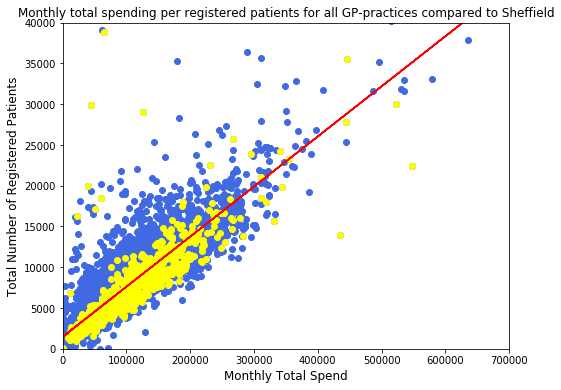

In [45]:
# plot those data points
#fig, ax = plt.subplots()
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x= nationaldemo['act_cost']
y = nationaldemo['Total_All']

x1= sheffield_demo['act_cost']
y1= sheffield_demo['Total_All']

ax.scatter(x, y, color='royalblue')
ax.scatter(x1, y1, color='yellow')

fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.set_title('Monthly total spending per registered patients for all GP-practices compared to Sheffield')
ax.set_xlabel("Monthly Total Spend",fontsize=12)
ax.set_ylabel("Total Number of Registered Patients",fontsize=12)

max_x = (nationaldemo.act_cost.max())
max_y = (nationaldemo.Total_All.max())
ax.set_xlim(0, 700000)
ax.set_ylim(0, 40000)

####  4.Visualize the relative costs per patient of all national GP-practices in a histogram.

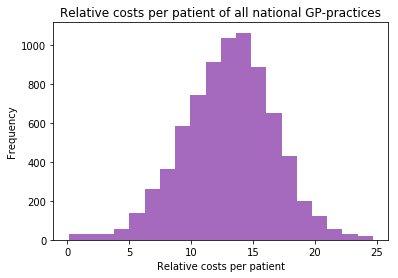

In [49]:
#Delete outliers
rel_costs= nationaldemo.sort_values(by=['relativecostperpatients'], ascending=False)

relcosts= rel_costs[50:-4] #removing the outliers

x= relcosts.relativecostperpatients.values
plt.hist(x, bins=20,color='#A569BD') #Using Hex-code colours  
plt.xlabel("Relative costs per patient")
plt.ylabel("Frequency")
plt.title("Relative costs per patient of all national GP-practices")
plt.show()

#### 5.Use descriptive statistics to show how your assigned city compares to the national level.

# Assignment C 
Using the entire dataset from the HSCIC GP Practice Prescribing data, address the following queries using a combination of narrative, tables, figures and descriptive statistcs:

#### 1. Identify for all GP-practices the relative costs per patient for all statin prescriptions (simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin) by using the dataset from December 2015.

In [50]:
# Filter out all the statin drugs.
statin_pres = prescribing_df.loc[prescribing_df['bnf_name'].str.contains('simvastatin|atorvastatin|rosuvastatin|pravastatin|fluvastatin',  case=False)]
statin_pres.head()

,sha,pct,prac_code,bnf_code,bnf_name,items,nic,act_cost,quantity,period
102,Q44,RXA,Y00327,0212000B0AAACAC,Atorvastatin_Tab 40mg,2,1.67,1.67,29,201512
103,Q44,RXA,Y00327,0212000Y0AAABAB,Simvastatin_Tab 20mg,1,0.10,0.20,3,201512
647,Q44,RY7,N85638,0212000B0AAABAB,Atorvastatin_Tab 20mg,1,0.70,0.76,14,201512
648,Q44,RY7,N85638,0212000B0AAACAC,Atorvastatin_Tab 40mg,1,0.06,0.17,1,201512
650,Q44,RY7,N85638,0212000X0AAAAAA,Pravastatin Sod_Tab 10mg,1,0.29,0.38,7,201512


In [51]:
# MergeDataframes to identify relative cost per patients for all statin costs

# Create new dataframe with statin data grouped prac_code as index 
statin = statin_pres.groupby('prac_code')['act_cost', 'nic', 'quantity'].sum()

# Create new dataframe with total patient data grouped prac_code as index 
patient_demo2 = patient_demo.groupby('GP_PRACTICE_CODE')['POSTCODE','Total_All'].sum()

# merge along the index
total_statin = pd.merge(statin, patient_demo2, right_index=True, left_index=True)

# Create function to calculate the relative Cost Per pateint Across all GP practices for Statin prescriptions

total_statin['relative cost per patient'] = total_statin['act_cost'] / total_statin['Total_All']
total_statin.head() 

,act_cost,nic,quantity,Total_All,relative cost per patient
A81001,1816.80,1956.63,18792,4234,0.429098
A81002,6513.51,6997.64,98340,19691,0.330786
A81003,868.39,925.06,17464,3357,0.258680
A81004,2134.60,2289.98,36302,9151,0.233264
A81005,1887.11,2019.19,35575,7883,0.239390


#### 2.Identify for all GP-practice the associated Index of Multiple Deprivation (IMD) for each GP-Practice in your assigned city.

In [52]:
#import the data 
url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/deprivation-by-postcode.csv'
imd = pd.read_csv(url , index_col=False)

#rename the IMD
imd.rename(columns={'Postcode': 'postcode', 'Index of Multiple Deprivation Rank': 'imd_Rank', 'Index of Multiple Deprivation Decile': 'imd_decile'}, inplace=True)

#set the index to postcode
#output selected columns with imd Rand and Decile
imd1= imd.iloc[:, [0,4,5]].set_index('postcode')
imd1.head()

,imd_Rank,imd_decile
postcode,,
TS18 1HU,73.0,1.0
TS18 2AW,551.0,1.0
TS26 8DB,967.0,1.0
TS1 3BE,1914.0,1.0
TS14 7DJ,7082.0,3.0


In [53]:
#Use Sheff prac data 
shef_prac1.head()

,yearmonth,prac_code,practice,address1,address2,city,region,postcode
900,201512,C81002,MOSS VALLEY MEDICAL PRACTICE,MOSS VALLEY MEDICAL PRACT,GOSBER ROAD ECKINGTON,SHEFFIELD,DERBYSHIRE,S21 4BZ
966,201512,C81070,OAKHILL MEDICAL PRACTICE,OAKHILL MEDICAL PRACTICE,OAKHILL ROAD DRONFIELD,SHEFFIELD,,S18 2EJ
986,201512,C81095,DR HR MCMURRAY'S PRACTICE,EMMETT CARR SURGERY,ABBEY PLACE RENISHAW,NR.SHEFFIELD,,S21 3TY
1361,201512,C85004,PENISTONE GROUP PMS PRACTICE,PENISTONE GROUP PRACTICE,THE SURGERY 19 HIGH ST,PENISTONE SHEFFIELD,SOUTH YORKSHIRE,S36 6BR
1423,201512,C87004,KIVETON PARK MEDICAL PRACTICE,KIVETON PARK PRIMARY CARE,CHAPEL WAY KIVETON PARK,SHEFFIELD,SOUTH YORKSHIRE,S26 6QU


In [54]:
#Reset index to postcode for merge 
shef_imd = shef_prac1.set_index('postcode')
shef_imd .head()

,yearmonth,prac_code,practice,address1,address2,city,region
postcode,,,,,,,
S21 4BZ,201512,C81002,MOSS VALLEY MEDICAL PRACTICE,MOSS VALLEY MEDICAL PRACT,GOSBER ROAD ECKINGTON,SHEFFIELD,DERBYSHIRE
S18 2EJ,201512,C81070,OAKHILL MEDICAL PRACTICE,OAKHILL MEDICAL PRACTICE,OAKHILL ROAD DRONFIELD,SHEFFIELD,
S21 3TY,201512,C81095,DR HR MCMURRAY'S PRACTICE,EMMETT CARR SURGERY,ABBEY PLACE RENISHAW,NR.SHEFFIELD,
S36 6BR,201512,C85004,PENISTONE GROUP PMS PRACTICE,PENISTONE GROUP PRACTICE,THE SURGERY 19 HIGH ST,PENISTONE SHEFFIELD,SOUTH YORKSHIRE
S26 6QU,201512,C87004,KIVETON PARK MEDICAL PRACTICE,KIVETON PARK PRIMARY CARE,CHAPEL WAY KIVETON PARK,SHEFFIELD,SOUTH YORKSHIRE


In [55]:
shef_imd1 = shef_imd.iloc[:, [1,2,5]]
shef_imd1.head()

,prac_code,practice,city
postcode,,,
S21 4BZ,C81002,MOSS VALLEY MEDICAL PRACTICE,SHEFFIELD
S18 2EJ,C81070,OAKHILL MEDICAL PRACTICE,SHEFFIELD
S21 3TY,C81095,DR HR MCMURRAY'S PRACTICE,NR.SHEFFIELD
S36 6BR,C85004,PENISTONE GROUP PMS PRACTICE,PENISTONE SHEFFIELD
S26 6QU,C87004,KIVETON PARK MEDICAL PRACTICE,SHEFFIELD


In [56]:
#merge on index 
shef_imd = pd.merge(shef_imd1,imd1, right_index=True, left_index=True)
shef_imd.head() 

,prac_code,practice,city,imd_Rank,imd_decile
postcode,,,,,
S1 3PB,Y02565,SHEFFIELD CITY GP HC (WIC),SHEFFIELD,11121.0,4.0
S1 3PB,Y02565,SHEFFIELD CITY GP HC (WIC),SHEFFIELD,11121.0,4.0
S1 3PB,Y02566,SHEFFIELD CITY GP HC (REG),SHEFFIELD,11121.0,4.0
S1 3PB,Y02566,SHEFFIELD CITY GP HC (REG),SHEFFIELD,11121.0,4.0
S1 4JP,Y02025,DRUG AND ALCOHOL ACTION TEAM,SHEFFIELD,2596.0,1.0


#### 3.Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile. Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD). Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer.

In [57]:
# Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile. 
practice_df.head()

,yearmonth,prac_code,practice,address1,address2,city,region,postcode
0,201512,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
1,201512,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
2,201512,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,TS1 3BE
3,201512,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ
4,201512,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MED PRACT,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AT


In [59]:
imd1.head()

,imd_Rank,imd_decile
postcode,,
TS18 1HU,73.0,1.0
TS18 2AW,551.0,1.0
TS26 8DB,967.0,1.0
TS1 3BE,1914.0,1.0
TS14 7DJ,7082.0,3.0


In [60]:
#set postcode as index for both 
total_prac = practice_df.set_index('postcode')

#merge on index 
total_imd_merged = pd.merge(imd1, total_prac, right_index=True, left_index=True)
#total_imd_merged.head()

#set praccode to index 
total_prac1 = total_imd_merged.set_index('prac_code')
#total_prac1.head()

#statin_pres.head()

total_prac_statin = statin_pres.set_index('prac_code')
#total_prac_statin.head()

#merge on index 
total_imd_statin = pd.merge(total_prac1, total_prac_statin, right_index=True, left_index=True)
total_imd_statin.head()


,imd_Rank,imd_decile,yearmonth,practice,address1,address2,city,region,sha,pct,bnf_code,bnf_name,items,nic,act_cost,quantity,period
prac_code,,,,,,,,,,,,,,,,,
A81002,551.0,1.0,201512,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,Q45,00K,0212000AAAAAAAA,Rosuvastatin Calc_Tab 10mg,32,793.32,733.96,1232,201512
A81002,551.0,1.0,201512,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,Q45,00K,0212000AAAAABAB,Rosuvastatin Calc_Tab 20mg,14,546.42,505.41,588,201512
A81002,551.0,1.0,201512,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,Q45,00K,0212000AAAAADAD,Rosuvastatin Calc_Tab 5mg,22,631.05,583.80,980,201512
A81002,551.0,1.0,201512,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,Q45,00K,0212000ACAAABAB,Simvastatin/Ezetimibe_Tab 40mg/10mg,1,38.98,36.06,28,201512
A81002,551.0,1.0,201512,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,Q45,00K,0212000B0AAAAAA,Atorvastatin_Tab 10mg,115,203.65,190.23,4874,201512


In [61]:
#sort the act cost in decreasing to identify lowest spenders 
total_imd_statin.sort_values('act_cost')

,imd_Rank,imd_decile,yearmonth,practice,address1,address2,city,region,sha,pct,bnf_code,bnf_name,items,nic,act_cost,quantity,period
prac_code,,,,,,,,,,,,,,,,,
Y04567,12585.0,4.0,201512,LCH POLICE CUSTODY SUITES SERVICES,STOCKDALE HOUSE,VICTORIA ROAD,LEEDS,,Q52,RY6,0212000Y0AAABAB,Simvastatin_Tab 20mg,1,0.03,0.14,1,201512
Y04567,12585.0,4.0,201512,LCH POLICE CUSTODY SUITES SERVICES,STOCKDALE HOUSE,VICTORIA ROAD,LEEDS,,Q52,RY6,0212000Y0AAABAB,Simvastatin_Tab 20mg,1,0.03,0.14,1,201512
Y01815,30354.0,10.0,201512,PRIMECARE OOH,BROOMFIELD HOSPITAL,COURT ROAD,CHELMSFORD,ESSEX,Q57,06Q,0212000Y0AAABAB,Simvastatin_Tab 20mg,1,0.03,0.14,1,201512
Y00502,30064.0,10.0,201512,IC24 LTD (NORFOLK & WISBECH OOH),IC24 LTD KINGSTON HOUSE,THE LONG BARROW,ASHFORD,KENT,Q56,06W,0212000B0AAAAAA,Atorvastatin_Tab 10mg,1,0.04,0.15,1,201512
Y00502,30064.0,10.0,201512,IC24 LTD (NORFOLK & WISBECH OOH),IC24 LTD KINGSTON HOUSE,THE LONG BARROW,ASHFORD,KENT,Q56,06W,0212000B0AAAAAA,Atorvastatin_Tab 10mg,1,0.04,0.15,1,201512
Y05107,416.0,1.0,201512,STAR SCHEME,STAR SCHEME,RPCH - WEST DYKE ROAD,REDCAR,CLEVELAND,Q45,00M,0212000Y0AAADAD,Simvastatin_Tab 40mg,1,0.04,0.15,1,201512
Y00502,30064.0,10.0,201512,IC24 LTD (NORFOLK & WISBECH OOH),IC24 LTD KINGSTON HOUSE,THE LONG BARROW,ASHFORD,KENT,Q56,06W,0212000B0AAAAAA,Atorvastatin_Tab 10mg,1,0.04,0.15,1,201512
Y00502,30064.0,10.0,201512,IC24 LTD (NORFOLK & WISBECH OOH),IC24 LTD KINGSTON HOUSE,THE LONG BARROW,ASHFORD,KENT,Q56,06W,0212000B0AAAAAA,Atorvastatin_Tab 10mg,1,0.04,0.15,1,201512
Y00502,30064.0,10.0,201512,IC24 LTD (NORFOLK & WISBECH OOH),IC24 LTD KINGSTON HOUSE,THE LONG BARROW,ASHFORD,KENT,Q56,06W,0212000B0AAAAAA,Atorvastatin_Tab 10mg,1,0.04,0.15,1,201512


In [62]:
pat_demo = patient_demo2
#pat_demo.head()

relative_imd = pd.merge(total_imd_statin, total_statin, right_index=True, left_index=True)
#relative_imd.head()

relative_imd2 = relative_imd.iloc[:, [0,1,3,6,11,12,14,15,20,21]]
#relative_imd2.head()

rel_imd2 = relative_imd2.reset_index()
rel_imd2.rename(columns={'index': 'prac_code','act_cost_x':'act_cost'}, inplace=True)
#rel_imd2.head()

#cut the quintile into 10 
rel_imd2['decile'] = pd.qcut(rel_imd2['act_cost'], 10, labels=False)
lowest = rel_imd2[rel_imd2.decile == 0]
highest = rel_imd2[rel_imd2.decile == 9]

In [63]:
lowest_values = lowest.sort_values(by=['relative cost per patient'])
lowest_values.head()

,prac_code,imd_Rank,imd_decile,practice,city,bnf_name,items,act_cost,quantity_x,Total_All,relative cost per patient,decile
35439,C88627,8743.0,3.0,UNIVERSITY HEALTH SERVICE HEALTH CENTRE,SHEFFIELD,Atorvastatin_Tab 20mg,1,1.30,28,29880,0.000420,0
35440,C88627,8743.0,3.0,UNIVERSITY HEALTH SERVICE HEALTH CENTRE,SHEFFIELD,Atorvastatin_Tab 40mg,1,2.99,56,29880,0.000420,0
35442,C88627,8743.0,3.0,UNIVERSITY HEALTH SERVICE HEALTH CENTRE,SHEFFIELD,Simvastatin_Tab 40mg,1,2.07,56,29880,0.000420,0
21326,B86110,8229.0,3.0,LEEDS STUDENT MEDICAL PRACTICE,BLENHEIM WALK,Pravastatin Sod_Tab 10mg,1,2.14,56,39138,0.000517,0
21325,B86110,8229.0,3.0,LEEDS STUDENT MEDICAL PRACTICE,BLENHEIM WALK,Atorvastatin_Tab 80mg,1,5.17,56,39138,0.000517,0


In [64]:
highest_values = highest.sort_values(by=['relative cost per patient'])
highest_values.head() 

,prac_code,imd_Rank,imd_decile,practice,city,bnf_name,items,act_cost,quantity_x,Total_All,relative cost per patient,decile
127458,N82117,10339.0,4.0,BROWNLOW GROUP PRACTICE,LIVERPOOL,Rosuvastatin Calc_Tab 10mg,19,300.73,504,35236,0.049433,9
80745,H85001,15132.0,5.0,WANDSWORTH MEDICAL CENTRE,WANDSWORTH,Rosuvastatin Calc_Tab 20mg,12,409.57,476,16292,0.056035,9
72448,G85002,17096.0,6.0,STREATHAM HIGH PRACTICE,STREATHAM,Atorvastatin_Tab 40mg,197,320.99,5789,14468,0.058167,9
72436,G85002,17096.0,6.0,STREATHAM HIGH PRACTICE,STREATHAM,Atorvastatin_Tab 40mg,197,320.99,5789,14468,0.058167,9
72424,G85002,17096.0,6.0,STREATHAM HIGH PRACTICE,STREATHAM,Atorvastatin_Tab 40mg,197,320.99,5789,14468,0.058167,9


#### Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD)

In [65]:
lowest_values['imd_Rank'].max()

32841.0

In [66]:
lowest_values['imd_Rank'].min()

15.0

In [67]:
highest_values['imd_Rank'].max()

32841.0

In [68]:
highest_values['imd_Rank'].min()

3.0

#### Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer.

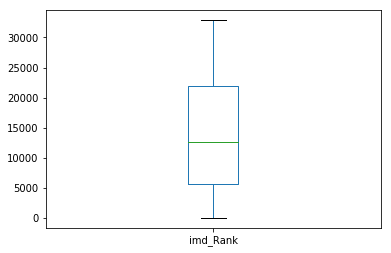

In [71]:
highest_values['imd_Rank'].plot(kind='box', by='group')

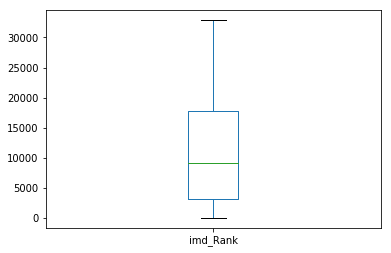

In [73]:
lowest_values['imd_Rank'].plot(kind='box', by='group')

#### 4.Identify for all GP-practices the associated nine English regions. Identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015.

In [74]:
url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/NHSOF_1.1_I00656_D.csv'
mortality_data = pd.read_csv(url , index_col=False)
#imd.iloc[:, ['postcode', 'Index of Multiple Deprivation Rank', 'Index of Multiple Deprivation Decile']] #too many columns only need to print ones of interest 
mortality_data.head()

,Year,Period of coverage,Breakdown,Level,Level description,Gender,Age,Indicator value,Lower CI,Upper CI,Numerator,Denominator
0,2016,1/1/2016 to 31/12/2016,England,England,England,Person,All,72.7,71.9,73.5,"33,816","50,798,600"
1,2015,1/1/2015 to 31/12/2015,England,England,England,Person,All,74,73.3,74.8,"33,664","50,360,500"
2,2014,1/1/2014 to 31/12/2014,England,England,England,Person,All,73.8,73,74.6,"32,895","49,941,800"
3,2013,1/1/2013 to 31/12/2013,England,England,England,Person,All,76.6,75.7,77.4,"33,408","49,584,200"
4,2012,1/1/2012 to 31/12/2012,England,England,England,Person,All,77.7,76.8,78.5,"33,258","49,281,700"


In [76]:
#Identify Year == 2015

mortality_15 = mortality_data[mortality_data['Year'].astype(str).str[-4:].str.contains('2015')]
mortality_15.head()

,Year,Period of coverage,Breakdown,Level,Level description,Gender,Age,Indicator value,Lower CI,Upper CI,Numerator,Denominator
1,2015,1/1/2015 to 31/12/2015,England,England,England,Person,All,74,73.3,74.8,"33,664","50,360,500"
30,2015,1/1/2015 to 31/12/2015,England,England,England,Female,All,46.5,45.6,47.4,"10,835","25,186,400"
31,2015,1/1/2015 to 31/12/2015,England,England,England,Female,0 to 4,1.7,1.1,2.4,28,"1,674,300"
32,2015,1/1/2015 to 31/12/2015,England,England,England,Female,5 to 9,0.4,0.2,0.9,7,"1,638,600"
33,2015,1/1/2015 to 31/12/2015,England,England,England,Female,10 to 14,0.3,0.1,0.7,4,"1,465,100"


In [ ]:
#Sort Data by Region 


#### 5.Visualize (using matplotlib) for each region spending for statins [x-axis] and the mortality rate [y-axis]. Assess whether relative spending for statin prescriptions in each regions correlates with the mortality rate from cardiovascular diseases.

In [300]:
#import postcode data
url = 'https://s3.eu-west-2.amazonaws.com/dmhr-data/postcodes.csv'
ons_postcodes = pd.read_csv(url , index_col=False)
ons_postcodes .head(20)

,Postcode 1,Postcode 2,Postcode 3,Date Introduced,User Type,Easting,Northing,Positional Quality,County Code,County Name,...,Middle Super Output Area Code,Middle Super Output Area Name,Output Area Classification Code,Output Area Classification Name,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location,Socrata ID
0,S20 6RU,S20 6RU,S20 6RU,06-1997,0,441432.0,382852.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02001671,NaN,6B3,Suburbanites;Semi-detached suburbia;Semi-detac...,-1.379193,53.340953,Postcode Level,21/09/2017,"(53.340953, -1.379193)",1311804
1,TW4 7BD,TW4 7BD,TW4 7BD,01-1980,0,512373.0,175453.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02000541,NaN,4B1,Multicultural metropolitans;Challenged Asian t...,-0.383652,51.466899,Postcode Level,21/09/2017,"(51.466899, -0.383652)",1630253
2,GU513ZQ,GU51 3ZQ,GU51 3ZQ,05-2003,1,481569.0,155037.0,1,E10000014,Hampshire,...,E02004757,NaN,6B4,Suburbanites;Semi-detached suburbia;Older work...,-0.831674,51.288637,Postcode Level,21/09/2017,"(51.288637, -0.831674)",652126
3,OX4 6BE,OX4 6BE,OX4 6BE,06-2000,0,455440.0,203036.0,1,E10000025,Oxfordshire,...,E02005956,NaN,4A1,Multicultural metropolitans;Rented family livi...,-1.198788,51.723313,Postcode Level,21/09/2017,"(51.723313, -1.198788)",1158807
4,TA7 9JH,TA7 9JH,TA7 9JH,01-1980,0,338745.0,139337.0,1,E10000027,Somerset,...,E02006072,NaN,1A2,Rural residents;Farming communities;Establishe...,-2.877144,51.149999,Postcode Level,21/09/2017,"(51.149999, -2.877144)",1547901
5,CO124PS,CO12 4PS,CO12 4PS,01-1980,0,623480.0,231987.0,1,E10000012,Essex,...,E02004574,NaN,8A1,Hard-pressed living;Industrious communities;In...,1.250003,51.941475,Postcode Level,21/09/2017,"(51.941475, 1.250003)",326121
6,G15 7DS,G15 7DS,G15 7DS,01-1980,0,251920.0,671413.0,1,S99999999,(pseudo) Scotland,...,S02001976,NaN,7C2,Constrained city dwellers;White communities;Co...,-4.370735,55.912955,Postcode Level,21/09/2017,"(55.912955, -4.370735)",584541
7,LE4 4LU,LE4 4LU,LE4 4LU,01-1980,0,459285.0,309986.0,1,E10000018,Leicestershire,...,E02005364,NaN,8A1,Hard-pressed living;Industrious communities;In...,-1.124441,52.684332,Postcode Level,21/09/2017,"(52.684332, -1.124441)",846727
8,SG180BW,SG18 0BW,SG18 0BW,01-1980,0,519092.0,245120.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02003603,NaN,8D2,Hard-pressed living;Migration and churn;Hard-p...,-0.263092,52.091621,Postcode Level,21/09/2017,"(52.091621, -0.263092)",1387276
9,CM2 7FH,CM2 7FH,CM2 7FH,01-2008,0,571961.0,205620.0,1,E10000012,Essex,...,E02004498,NaN,7A2,Constrained city dwellers;Challenged diversity...,0.488242,51.722934,Postcode Level,21/09/2017,"(51.722934, 0.488242)",312757


In [301]:
ons_postcodes['Country Name'].value_counts(dropna=False)

England             1447953
Scotland             156913
Wales                 91075
Northern Ireland      47923
Channel Islands        6582
Isle of Man            4699
NaN                    1044
Name: Country Name, dtype: int64

In [315]:
ons_postcodes['Region Name'].value_counts()

South East                  252297
North West                  194243
London                      181151
South West                  175687
East of England             164339
Yorkshire and The Humber    148294
West Midlands               142611
East Midlands               114829
North East                   74502
Name: Region Name, dtype: int64

In [324]:
regions = ons_postcodes['Region Name'].value_counts(dropna=False)

NaN                         308236
South East                  252297
North West                  194243
London                      181151
South West                  175687
East of England             164339
Yorkshire and The Humber    148294
West Midlands               142611
East Midlands               114829
North East                   74502
Name: Region Name, dtype: int64

In [348]:
#each region statin spend 
#ons_postcode_region = ons_postcodes['Region Name','Postcode 1']
#ons_postcode_region.head()

ons_postcode_region1 = ons_postcodes.iloc[:,[0,17]]
ons_postcode_region1.head()

,Postcode 1,Region Name
0,S20 6RU,Yorkshire and The Humber
1,TW4 7BD,London
2,GU513ZQ,South East
3,OX4 6BE,South East
4,TA7 9JH,South West


In [358]:
#visualise each statin spending 
#ons_all = ons_postcode_region1.set_index('Postcode 1')
#ons_all.head()

In [362]:
total_imd_statin1 = total_imd_statin.reset_index()

In [363]:
total_imd_statin1.head()

,prac_code,imd_Rank,imd_decile,yearmonth,practice,address1,address2,city,region,sha,pct,bnf_code,bnf_name,items,nic,act_cost,quantity,period
0,A81002,551.0,1.0,201512,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,Q45,00K,0212000AAAAAAAA,Rosuvastatin Calc_Tab 10mg,32,793.32,733.96,1232,201512
1,A81002,551.0,1.0,201512,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,Q45,00K,0212000AAAAABAB,Rosuvastatin Calc_Tab 20mg,14,546.42,505.41,588,201512
2,A81002,551.0,1.0,201512,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,Q45,00K,0212000AAAAADAD,Rosuvastatin Calc_Tab 5mg,22,631.05,583.80,980,201512
3,A81002,551.0,1.0,201512,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,Q45,00K,0212000ACAAABAB,Simvastatin/Ezetimibe_Tab 40mg/10mg,1,38.98,36.06,28,201512
4,A81002,551.0,1.0,201512,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,Q45,00K,0212000B0AAAAAA,Atorvastatin_Tab 10mg,115,203.65,190.23,4874,201512


In [ ]:
region_total = pd.merge(total_imd_statin1, ons_postcode_region1, on='postcode', row ='inner')
region_total.head()

In [ ]:
#visualise each statin 
statin_region = region_total.groupby('Region Name')['act_cost'].summ()

In [ ]:
#merge with moretality data 
mortality_statin = pd.merge(regions,statin_region )

In [ ]:
x = mortality_statin['act_cost'].values
y = mortality_statin['Indicator Values '].values

fig, ax = plt.subplot()
as.scatter(x, y)

for i, txt is enumerate(n):
    ax.annotate[txt, (x[i], y[i])]

plt.show()

# ASSIGNMENT D 
Using the Google FluTrends surveillance data, pick two random countries, one in the Northern hemisphere and one in the Southern hemisphere. For each of country:

### 1. 
Provide a visualisation of the seasonal patterns across all years.

In [554]:
import pandas as pd 
#AUSTRIA
#Loading the Data Sets from Austria Google FLu Trends 
austria ='https://www.google.org/flutrends/about/data/flu/at/data.txt'
cols2 = ['Date','Austria','Carinthia','Lower Austria','Upper Austria','Salzburg','Styria','Tyrol','Vorarlberg','Vienna']
austria =pd.read_csv(austria, sep=',', header=8).rename(columns=lambda x: x.strip())#To remove text 
austria['Date'] = pd.to_datetime(austria['Date'])
austria.head()

,Date,Austria,Carinthia,Lower Austria,Upper Austria,Salzburg,Styria,Tyrol,Vorarlberg,Vienna
0,2003-09-28,515,NaN,NaN,463,NaN,NaN,NaN,NaN,582
1,2003-10-05,752,NaN,NaN,482,NaN,NaN,NaN,NaN,789
2,2003-10-12,720,NaN,NaN,551,NaN,NaN,NaN,NaN,785
3,2003-10-19,727,NaN,425.0,573,NaN,NaN,NaN,NaN,720
4,2003-10-26,710,NaN,462.0,626,NaN,NaN,NaN,NaN,646


In [557]:
#set the index for the data
#austria.set_index('Date', inplace=True)
#austria.head()

In [558]:
#SOUTH_AFRICA
#Loading the Data Sets from South Google FLu Trends
south_africa ='https://www.google.org/flutrends/about/data/flu/za/data.txt'
#cols2 = ['Date', 'SouthAfrica', 'Gauteng', 'Kwazulu-Natal', 'Western Cape']
s_africa =pd.read_csv(south_africa, sep=',', header=8).rename(columns=lambda x: x.strip()) #To remove text 
s_africa['Date'] = pd.to_datetime(s_africa['Date'])
s_africa.head()

,Date,South Africa,Gauteng,Kwazulu-Natal,Western Cape
0,2006-01-15,1835,NaN,NaN,NaN
1,2006-01-22,1866,2216.0,NaN,NaN
2,2006-01-29,1991,2081.0,NaN,1733.0
3,2006-02-05,2169,2136.0,NaN,1977.0
4,2006-02-12,1958,2047.0,NaN,2038.0


In [559]:
s_africa.rename(columns={'South Africa': 'SouthAfrica'}, inplace=True)

In [560]:
#s_africa.set_index('Date', inplace=True)
#s_africa.head()

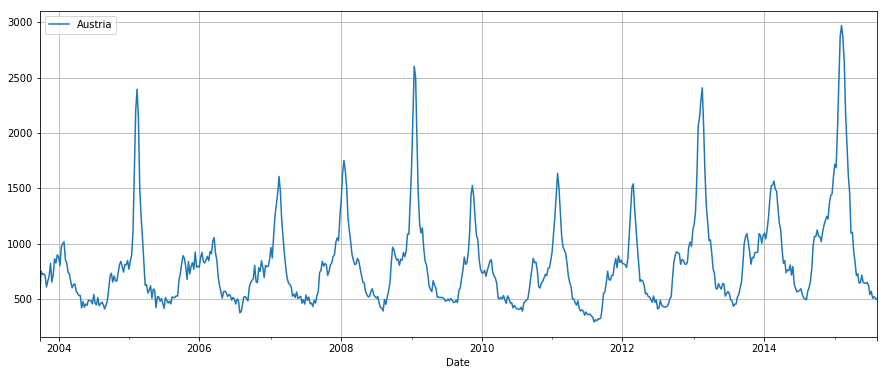

In [564]:
#Total Austrian FLuTrends 
ax = austria.plot(legend ='left', x='Date', y = 'Austria', figsize=(15, 6), grid=True)

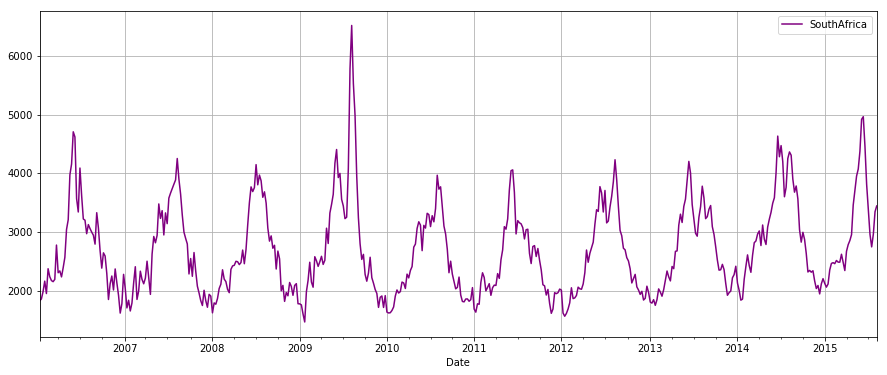

In [572]:
ax = s_africa.plot(legend ='left', x='Date', y = 'SouthAfrica', color = 'purple', figsize=(15, 6), grid=True)

### 2. 
Calculate the yearly minimum and maximum for each country. 

In [578]:
#Yearly Maximum and Yearly Minimum South Africa 
s_africa['Year'] = s_africa.Date.dt.to_period('Y')

ValueError: Invalid frequency: Y

In [577]:
s_africa_max = s_africa.groupby('Year')['South Africa'].max()
s_africa_max

KeyError: 'Year'

In [579]:
s_africa_min = s_africa.groupby('Year')['South Africa'].min()
s_africa_min

KeyError: 'Year'

In [73]:
#Yearly Maximum and Yearly Minimum Austria 
austria['Year'] = austria.Date.dt.to_period('Y')

In [74]:
austria_max = austria.groupby('Year')['Austria'].max()
austria_max

Year
2003     898
2004    1016
2005    2396
2006    1054
2007    1607
2008    1750
2009    2602
2010     867
2011    1635
2012    1540
2013    2408
2014    1602
2015    2972
Freq: A-DEC, Name: Austria, dtype: int64

In [75]:
austria_min = austria.groupby('Year')['Austria'].min()
austria_min

Year
2003    515
2004    408
2005    414
2006    374
2007    431
2008    390
2009    466
2010    389
2011    291
2012    409
2013    433
2014    491
2015    494
Freq: A-DEC, Name: Austria, dtype: int64

### 2a.
Provide and plot a reasonable mathematical function that could be used as an approximation for the seasonal trend for each country.

In [63]:
# Load libraries
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import warnings

# Suppress Warning
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [91]:
s_africa.head()

,Date,SouthAfrica,Gauteng,Kwazulu-Natal,Western Cape
0,2006-01-15,1835,NaN,NaN,NaN
1,2006-01-22,1866,2216.0,NaN,NaN
2,2006-01-29,1991,2081.0,NaN,1733.0
3,2006-02-05,2169,2136.0,NaN,1977.0
4,2006-02-12,1958,2047.0,NaN,2038.0
